# Instituto Federal de Minas Gerais - Campus Ouro Preto

## Pós Graduação em Inteligência Artificial

## Trabalho Final

Disciplina: Análise e Previsão de Séries Temporais

Prof.: Prof. Dr. Carlos Severiano

Aluno: Pâmela Murta Castro Lima

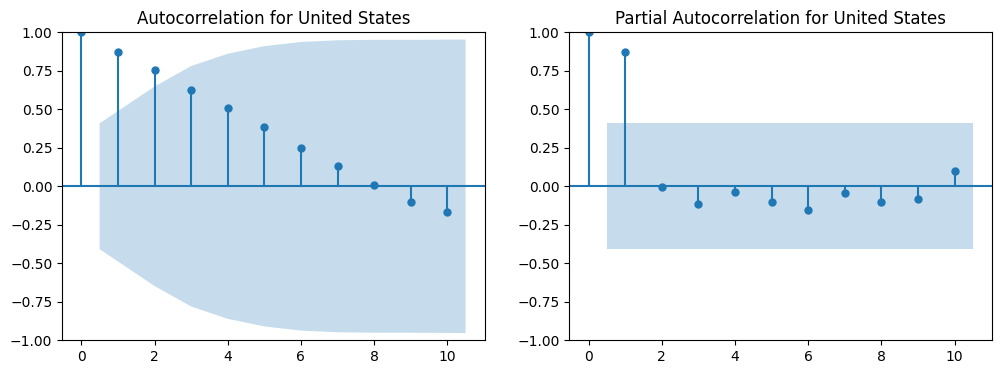

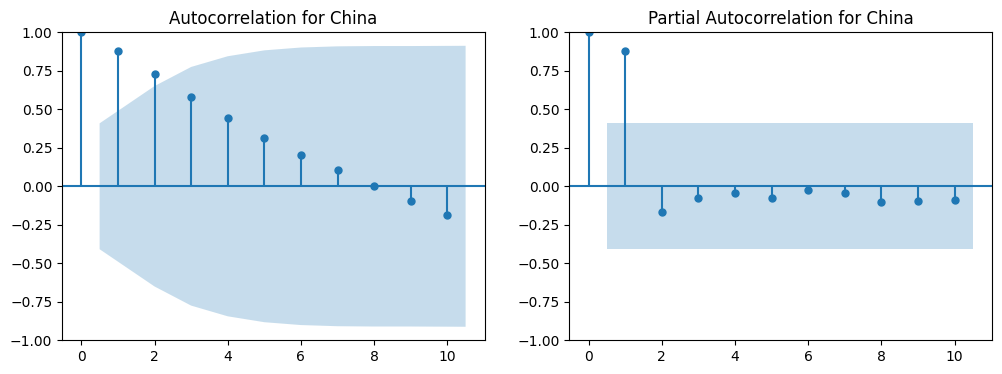

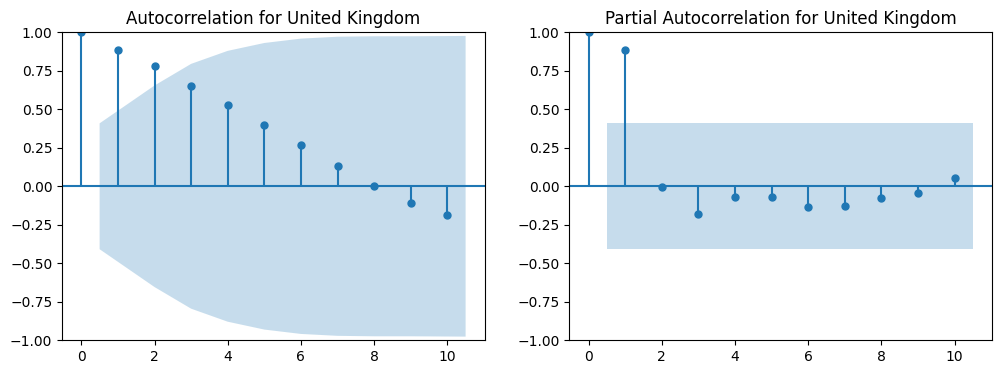

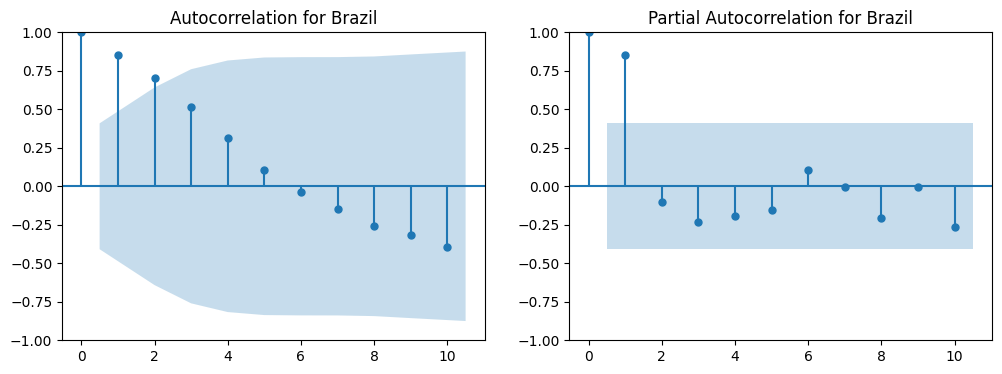

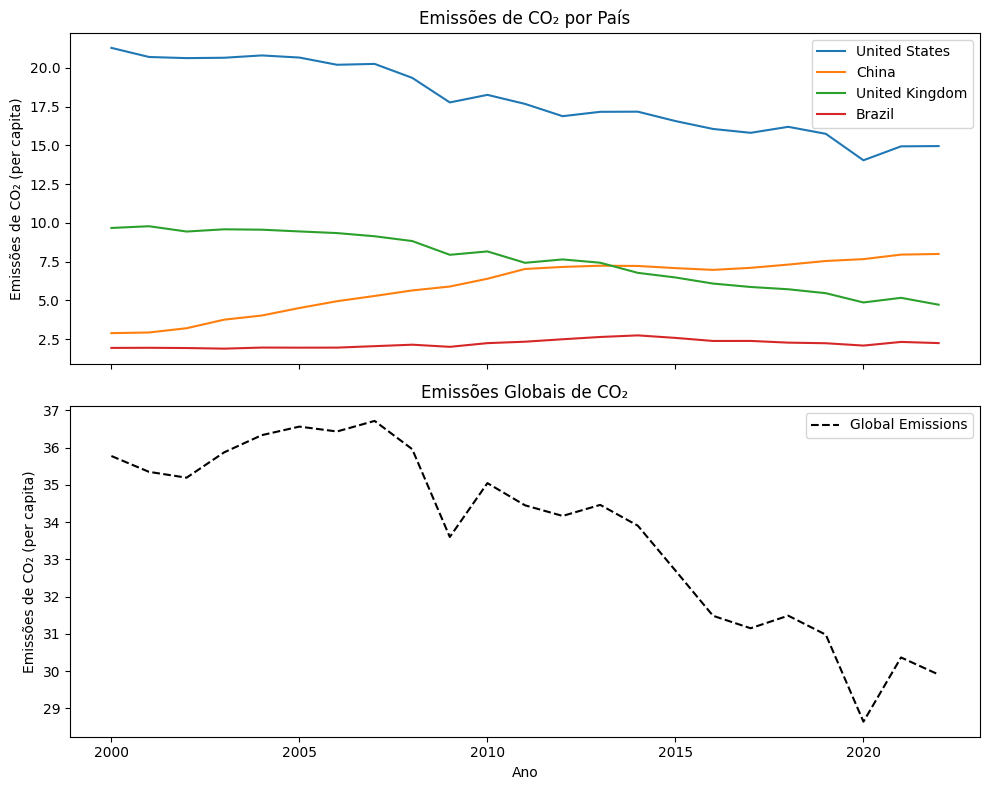

ADF Statistic for United States: -1.4190901870625774
p-value for United States: 0.5730906011043135
Critical Values for United States: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
A série para United States não é estacionária.


ADF Statistic for China: -4.374100081022279
p-value for China: 0.0003297778237238771
Critical Values for China: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
A série para China é estacionária.


ADF Statistic for United Kingdom: -1.2950275593858571
p-value for United Kingdom: 0.6314441297002356
Critical Values for United Kingdom: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
A série para United Kingdom não é estacionária.


ADF Statistic for Brazil: -1.7168924639942953
p-value for Brazil: 0.4224306591919345
Critical Values for Brazil: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}
A série para Brazil não é estacionária.


Após 

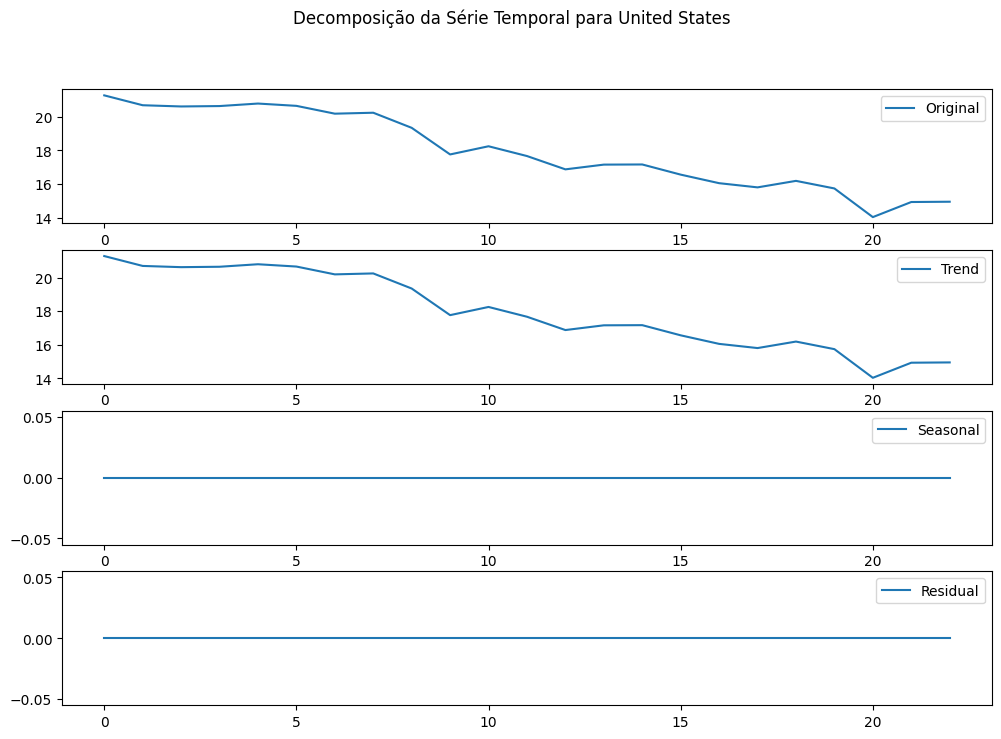

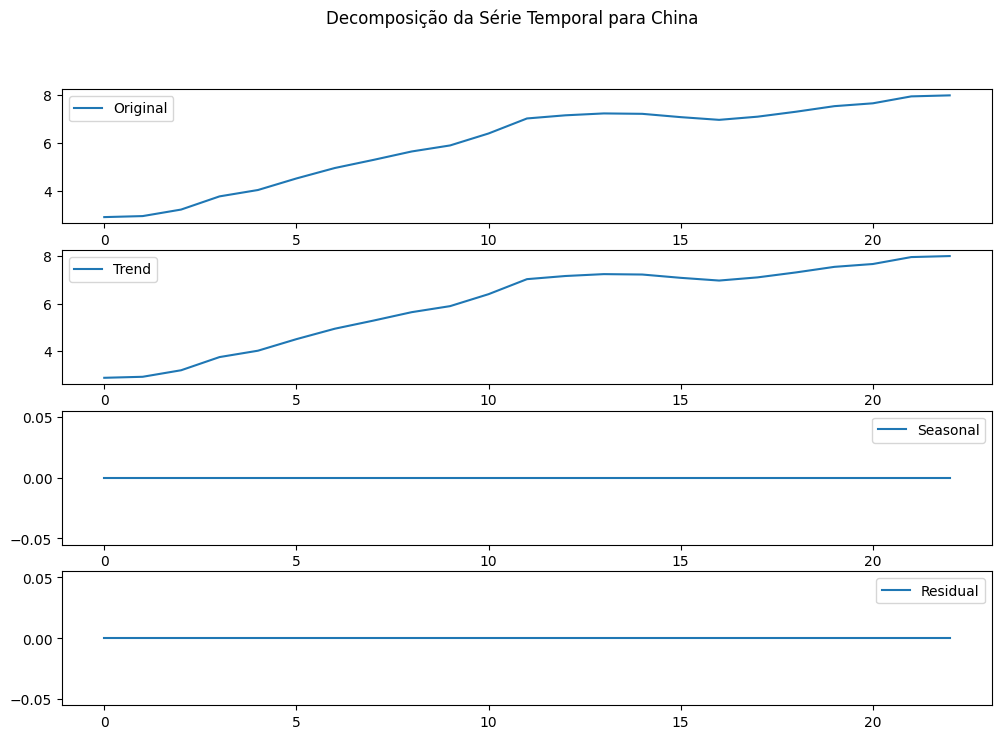

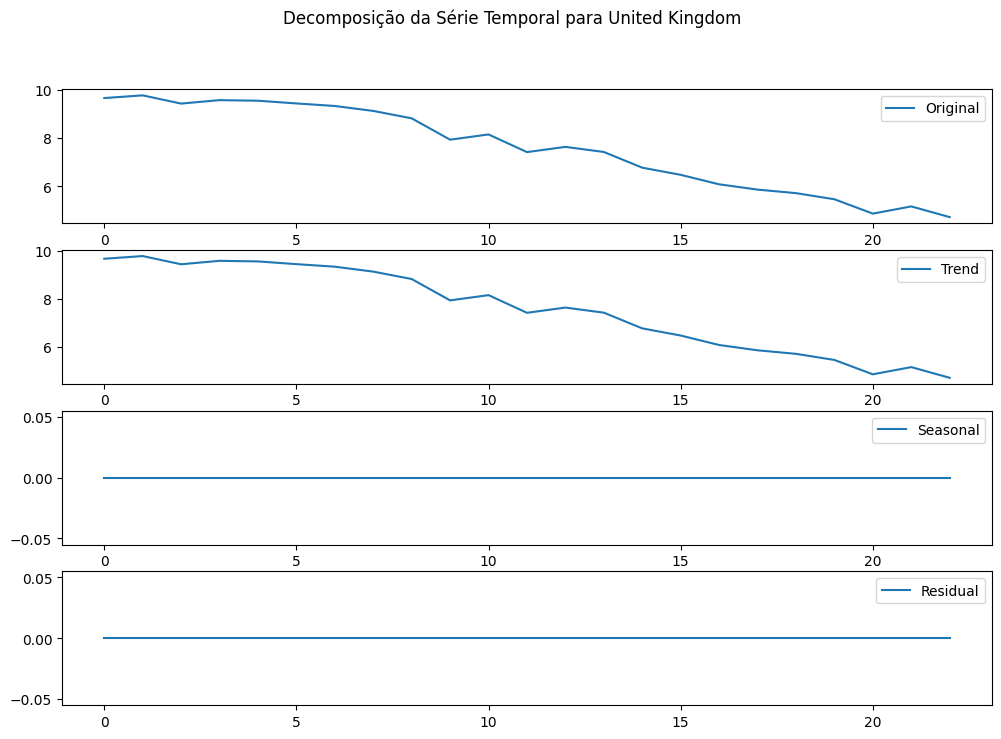

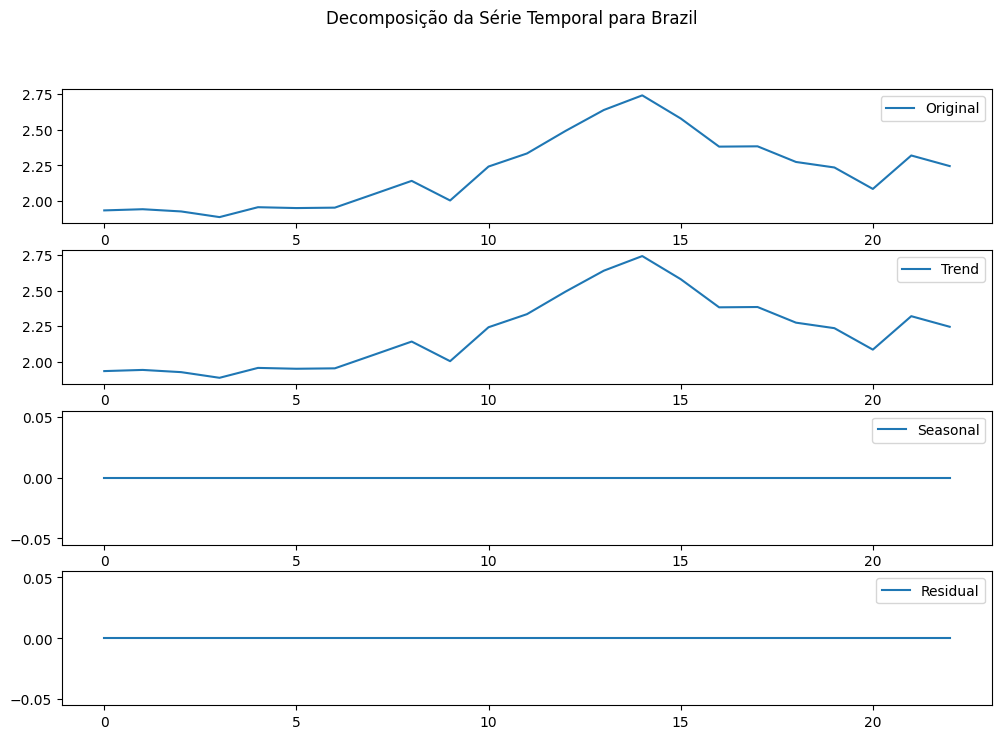

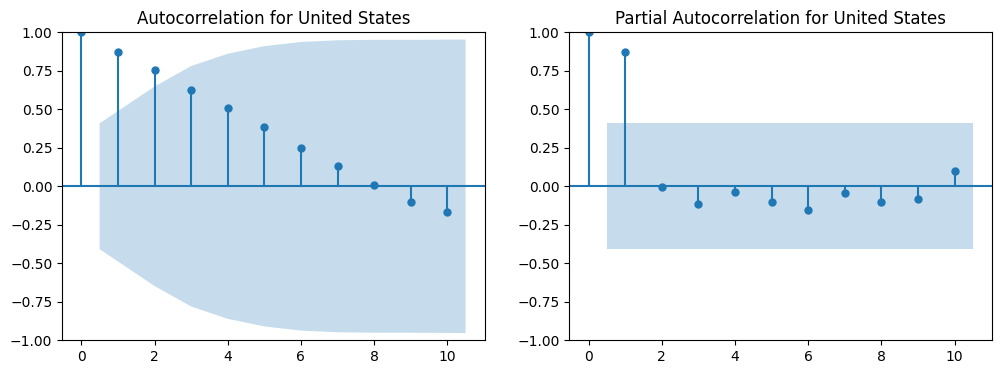

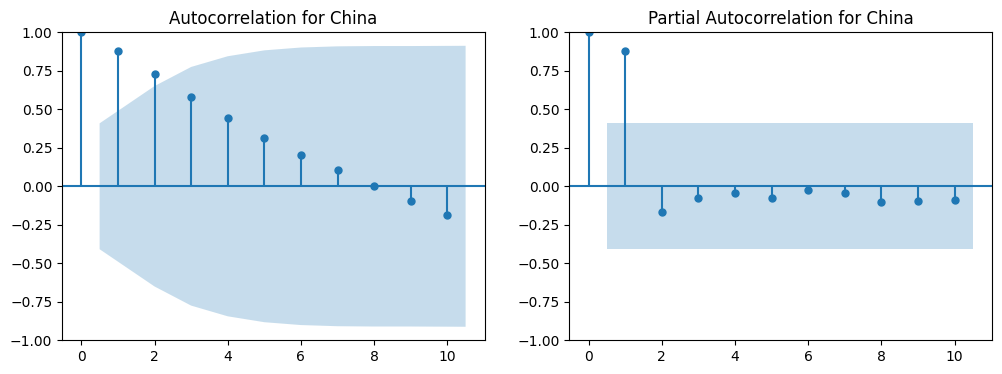

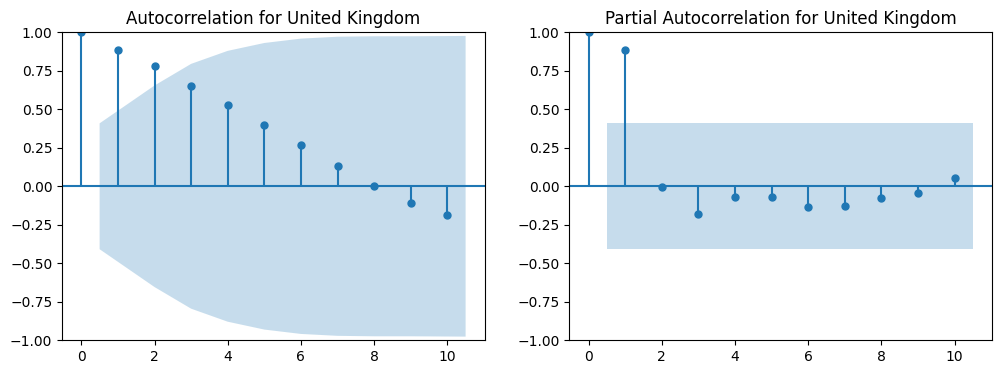

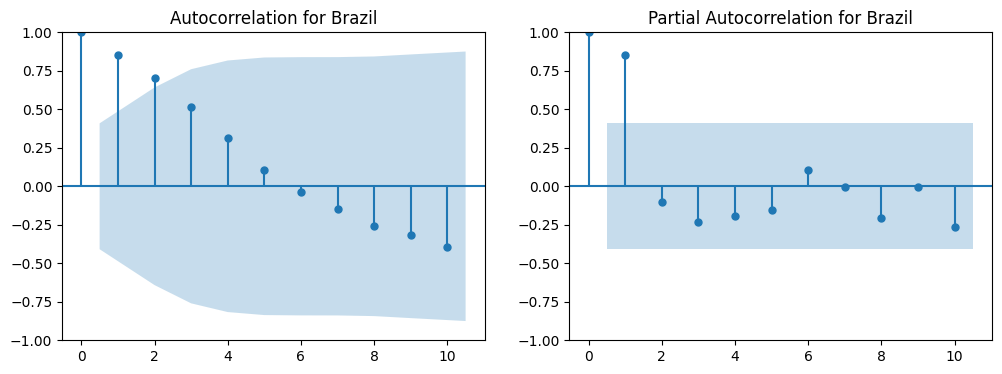

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit


# Definindo a função para carregar e filtrar os dados
def load_and_filter_data(file_path, countries, start_year, end_year):
    data = pd.read_csv(file_path)
    data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
    data = data[data['Entity'].isin(countries)]
    return data

# Definindo a função para plotar os gráficos de séries temporais
def plot_emissions(data, global_emissions):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    for country in countries:
        ax1.plot(data[data['Entity'] == country]['Year'], 
                 data[data['Entity'] == country]['Annual CO₂ emissions (per capita)'],
                 label=country)

    ax2.plot(global_emissions.index, global_emissions.values, label='Global Emissions', linestyle='--', color='black')

    ax1.set_title('Emissões de CO₂ por País')
    ax2.set_title('Emissões Globais de CO₂')
    ax2.set_xlabel('Ano')
    ax1.set_ylabel('Emissões de CO₂ (per capita)')
    ax2.set_ylabel('Emissões de CO₂ (per capita)')
    ax1.legend()
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Função para verificar a estacionariedade
def check_stationarity(data, country_name='Global'):
    result = adfuller(data)
    print(f'ADF Statistic for {country_name}:', result[0])
    print(f'p-value for {country_name}:', result[1])
    print(f'Critical Values for {country_name}:', result[4])
    
    if result[1] <= 0.05:
        print(f'A série para {country_name} é estacionária.')
    else:
        print(f'A série para {country_name} não é estacionária.')

# Função para aplicar a diferenciação sazonal
def difference_with_seasonal(data, interval):
    diff = np.array(data)
    for i in range(interval, len(data)):
        diff[i] = data[i] - data[i - interval]
    return diff[interval:]

# Função para realizar a segunda diferenciação sazonal
def second_difference_with_seasonal(data, interval):
    first_diff = difference_with_seasonal(data, interval)
    second_diff = difference_with_seasonal(first_diff, interval)
    return second_diff

# Função para plotar a decomposição da série temporal
def plot_decomposition(data, country_name='Global'):
    decomposition = seasonal_decompose(data, model='additive', period=1)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(4, 1, 1)
    plt.plot(data, label='Original')
    plt.legend()
    
    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Trend')
    plt.legend()
    
    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()
    
    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual')
    plt.legend()
    
    plt.suptitle(f'Decomposição da Série Temporal para {country_name}')
    plt.show()

# Função para plotar a autocorrelação e autocorrelação parcial
def plot_autocorrelation(data, country_name):
    max_lags = 10  # Ajuste este valor conforme necessário

    # Plotar autocorrelação e autocorrelação parcial
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plot_acf(data, lags=max_lags, ax=plt.gca(), title=f'Autocorrelation for {country_name}')

    plt.subplot(1, 2, 2)
    # Reduza o número de lags para o mínimo entre 50% do tamanho da amostra e max_lags
    max_lags_pacf = min(int(0.5 * len(data)), max_lags)
    plot_pacf(data, lags=max_lags_pacf, ax=plt.gca(), title=f'Partial Autocorrelation for {country_name}')

    plt.show()

# Lista de países para análise, incluindo 'Global'
countries = ['United States', 'China', 'United Kingdom', 'Brazil', 'Global']

# Carregando e filtrando os dados
file_path = "co-emissions-per-capita.csv"
start_year = 2000
end_year = 2022
countries = ['United States', 'China', 'United Kingdom', 'Brazil']

data = load_and_filter_data(file_path, countries, start_year, end_year)

# Carregar e filtrar os dados
data = load_and_filter_data(file_path, countries, start_year, end_year)

# Plotar autocorrelação para cada país
for country in countries:
    country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    plot_autocorrelation(country_data, country_name=country)

# Agrupando por ano e somando as emissões
global_emissions = data.groupby('Year')['Annual CO₂ emissions (per capita)'].sum()

# Plotando gráficos de séries temporais
plot_emissions(data, global_emissions)

# Verificar estacionariedade para cada país e a emissão global
for country in countries:
    if country == 'Global':
        country_data = global_emissions.values
    else:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    
    # Aplicar o teste ADF
    check_stationarity(country_data, country_name=country)
    print('\n')

# Aplicar diferenciação sazonal
for country in countries:
    if country == 'Global':
        country_data = global_emissions.values
    else:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    
    # Aplicar diferenciação sazonal, apenas para os países que não são estacionários
    stationarity_result = adfuller(country_data)
    
    if stationarity_result is not None and stationarity_result[1] > 0.05:
        seasonal_diff_country_data = difference_with_seasonal(country_data, interval=1)
        
        # Aplicar o teste ADF novamente após a diferenciação
        print(f'Após a diferenciação para {country}:')
        check_stationarity(seasonal_diff_country_data, country_name=country)
        print('\n')

# Aplicar segunda diferenciação sazonal
for country in countries:
    if country in ['United States', 'Brazil']:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
        
        # Aplicar a segunda diferenciação sazonal
        second_diff_country_data = second_difference_with_seasonal(country_data, interval=1)
        
        # Aplicar o teste ADF após a segunda diferenciação
        print(f'Após a segunda diferenciação para {country}:')
        check_stationarity(second_diff_country_data, country_name=country)
        print('\n')

# Plotar decomposição da série temporal para cada país
for country in countries:
    if country == 'Global':
        country_data = global_emissions.values
    else:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    
    plot_decomposition(country_data, country_name=country)

# Plotar autocorrelação e autocorrelação parcial para cada país
for country in countries:
    if country == 'Global':
        country_data = global_emissions.values
    else:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    
    plot_autocorrelation(country_data, country_name=country)


c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error for United States (Fold 5): 4.7277
Root Mean Squared Error for United States (Fold 5): 2.1743


Mean Squared Error for United States (Fold 5): 2.3621
Root Mean Squared Error for United States (Fold 5): 1.5369


Mean Squared Error for United States (Fold 5): 0.1701
Root Mean Squared Error for United States (Fold 5): 0.4124


Mean Squared Error for United States (Fold 5): 0.1092
Root Mean Squared Error for United States (Fold 5): 0.3304


Mean Squared Error for United States (Fold 5): 0.6399
Root Mean Squared Error for United States (Fold 5): 0.7999




c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


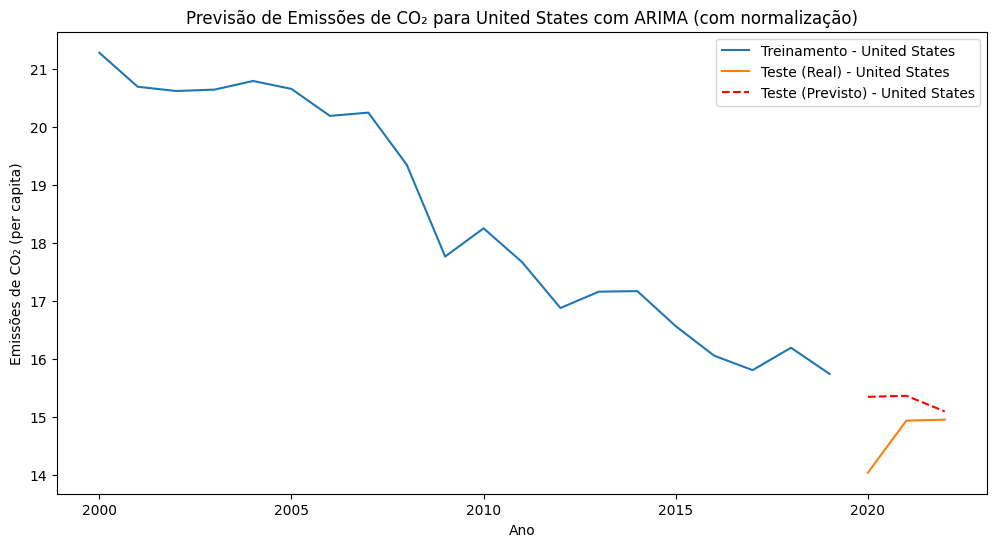

Mean Squared Error for China (Fold 5): 0.0300
Root Mean Squared Error for China (Fold 5): 0.1731


Mean Squared Error for China (Fold 5): 0.0541
Root Mean Squared Error for China (Fold 5): 0.2326


Mean Squared Error for China (Fold 5): 0.4868
Root Mean Squared Error for China (Fold 5): 0.6977


Mean Squared Error for China (Fold 5): 0.4599
Root Mean Squared Error for China (Fold 5): 0.6781


Mean Squared Error for China (Fold 5): 0.0107
Root Mean Squared Error for China (Fold 5): 0.1036




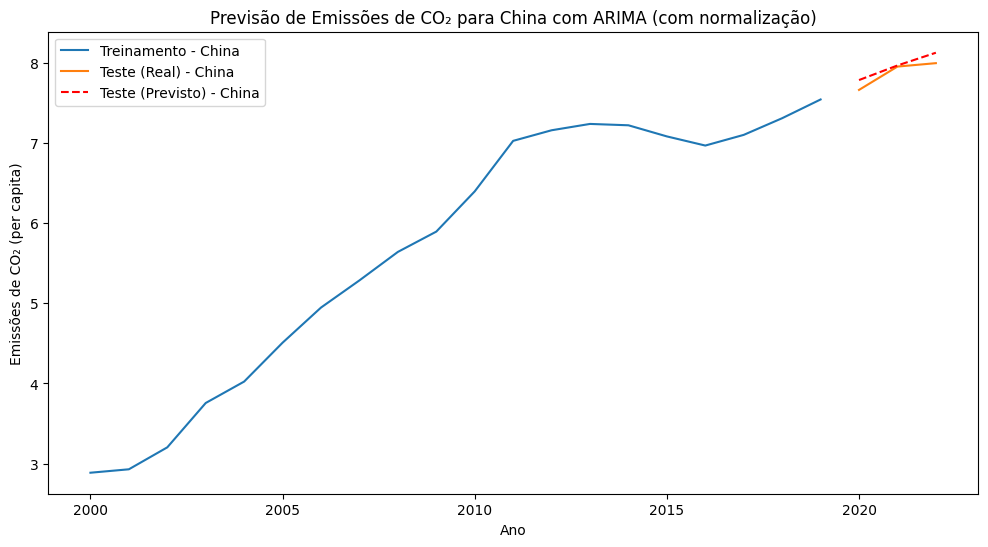

c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zer

Mean Squared Error for United Kingdom (Fold 5): 0.7449
Root Mean Squared Error for United Kingdom (Fold 5): 0.8631


Mean Squared Error for United Kingdom (Fold 5): 0.0215
Root Mean Squared Error for United Kingdom (Fold 5): 0.1465


Mean Squared Error for United Kingdom (Fold 5): 1.1336
Root Mean Squared Error for United Kingdom (Fold 5): 1.0647


Mean Squared Error for United Kingdom (Fold 5): 0.0416
Root Mean Squared Error for United Kingdom (Fold 5): 0.2040


Mean Squared Error for United Kingdom (Fold 5): 0.0931
Root Mean Squared Error for United Kingdom (Fold 5): 0.3051




c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


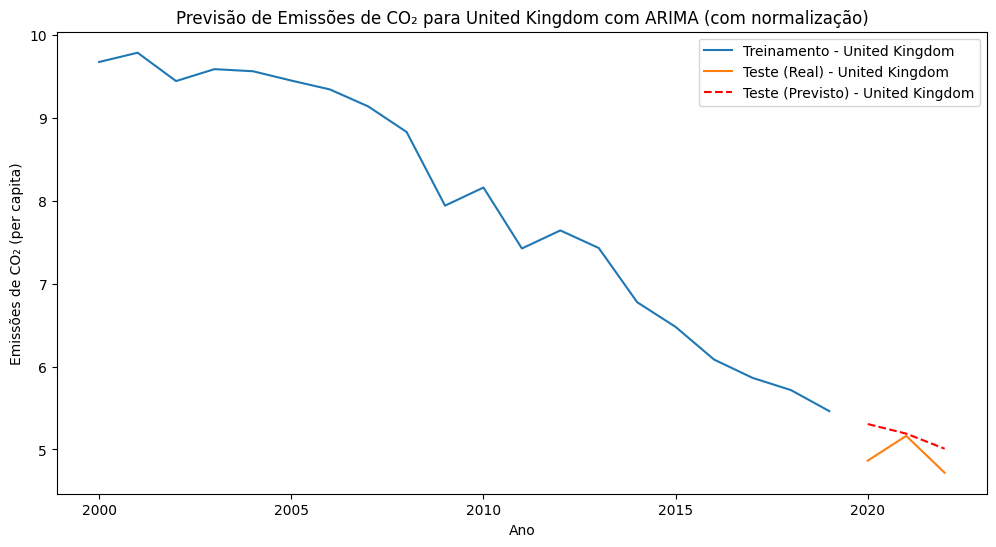

c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters foun

Mean Squared Error for Brazil (Fold 5): 0.0078
Root Mean Squared Error for Brazil (Fold 5): 0.0884


Mean Squared Error for Brazil (Fold 5): 0.0874
Root Mean Squared Error for Brazil (Fold 5): 0.2957


Mean Squared Error for Brazil (Fold 5): 0.1766
Root Mean Squared Error for Brazil (Fold 5): 0.4202


Mean Squared Error for Brazil (Fold 5): 0.0277
Root Mean Squared Error for Brazil (Fold 5): 0.1665


Mean Squared Error for Brazil (Fold 5): 0.0162
Root Mean Squared Error for Brazil (Fold 5): 0.1275




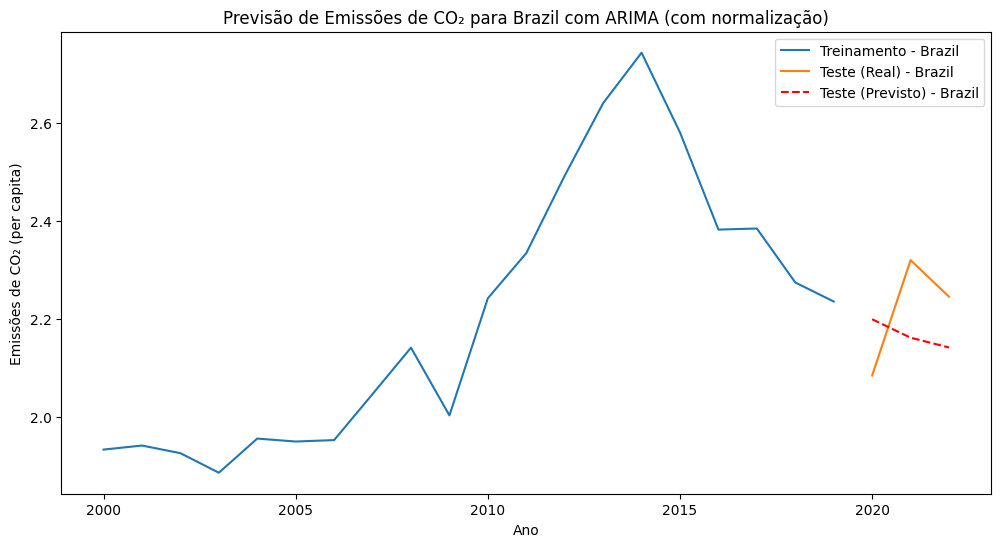

c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error for Global (Fold 5): 7.1103
Root Mean Squared Error for Global (Fold 5): 2.6665


Mean Squared Error for Global (Fold 5): 2.9484
Root Mean Squared Error for Global (Fold 5): 1.7171


Mean Squared Error for Global (Fold 5): 5.7959
Root Mean Squared Error for Global (Fold 5): 2.4075


Mean Squared Error for Global (Fold 5): 0.0494
Root Mean Squared Error for Global (Fold 5): 0.2222


Mean Squared Error for Global (Fold 5): 2.5022
Root Mean Squared Error for Global (Fold 5): 1.5818




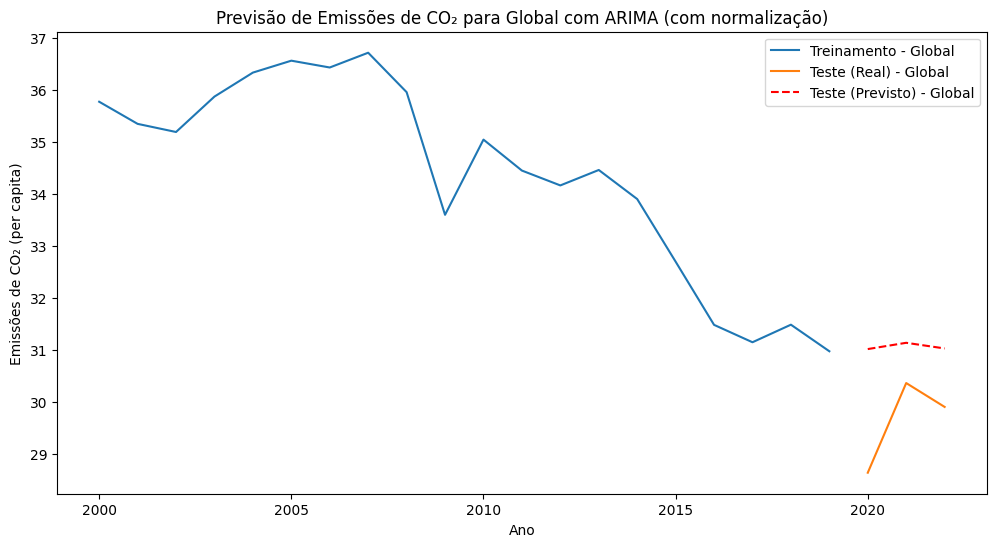

In [2]:
# Lista de países para análise, incluindo 'Global'
countries = ['United States', 'China', 'United Kingdom', 'Brazil', 'Global']

# Consolidar previsões para todos os países
consolidated_predictions = {}

# Dividir os dados em conjunto de treinamento e teste usando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # Escolha o número desejado de splits

for country in countries:
    if country == 'Global':
        country_data = global_emissions.reset_index()
    else:
        country_data = data[data['Entity'] == country]

    X = country_data['Year']
    y = country_data['Annual CO₂ emissions (per capita)'].values

    # Normalizar os dados
    mean_y, std_y = y.mean(), y.std()
    y_normalized = (y - mean_y) / std_y

    # Aplicar a técnica de ARIMA com validação cruzada
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_normalized[train_index], y_normalized[test_index]

        # Aplicar o modelo ARIMA
        order = (4, 1, 1)
        model = ARIMA(y_train, order=order)
        fit_model = model.fit()

        # Fazer previsões no conjunto de teste
        y_pred = fit_model.forecast(steps=len(X_test))

        # Desnormalizar as previsões
        y_pred = (y_pred * std_y) + mean_y

        # Calcular métricas de avaliação
        mse = mean_squared_error(y[test_index], y_pred)
        rmse = sqrt(mse)

        # Adicionar as previsões ao dicionário consolidado
        if country not in consolidated_predictions:
            consolidated_predictions[country] = []

        consolidated_predictions[country].append({
            'X_test': X_test,
            'y_test': y[test_index],
            'y_pred': y_pred,
            'mse': mse,
            'rmse': rmse
        })

        # Exibir métricas de avaliação para cada fold
        print(f'Mean Squared Error for {country} (Fold {tscv.n_splits}): {mse:.4f}')
        print(f'Root Mean Squared Error for {country} (Fold {tscv.n_splits}): {rmse:.4f}')
        print('\n')

    # Plotar o gráfico para cada país
    plt.figure(figsize=(12, 6))
    plt.plot(X_train, y[:len(X_train)], label=f'Treinamento - {country}')
    plt.plot(X_test, y[len(X_train):], label=f'Teste (Real) - {country}')
    plt.plot(X_test, y_pred, label=f'Teste (Previsto) - {country}', linestyle='--', color='red')
    plt.title(f'Previsão de Emissões de CO₂ para {country} com ARIMA (com normalização)')
    plt.xlabel('Ano')
    plt.ylabel('Emissões de CO₂ (per capita)')
    plt.legend()
    plt.show()